# Airline Passenger Satisfaction Prediction

## Import Data from SQL using sqlalchemy

In [1]:
import warnings
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine

# follows django database settings format, replace with your own settings
DATABASES = {
    'datafinal':{
        'POSTGRES_DBNAME': 'postgres',
        'POSTGRES_USERNAME': 'postgres',
        'POSTGRES_PASSWORD': 'password',
        'POSTGRES_ADDRESS': 'datafinal.c50h51d04cbn.us-east-2.rds.amazonaws.com',
        'POSTGRES_PORT': 5432,
    },
}

# choose the database to use
db = DATABASES['datafinal']

# construct an engine connection string
engine_string =  ('postgresql+psycopg2://{username}:{password}@{ipaddress}:{port}/{dbname}'
               .format(username= db['POSTGRES_USERNAME'],
                      password= db['POSTGRES_PASSWORD'],
                      ipaddress= db['POSTGRES_ADDRESS'],
                      port= db['POSTGRES_PORT'],
                      dbname= db['POSTGRES_DBNAME'])
               )

# create sqlalchemy engine
engine = create_engine(engine_string)

In [3]:
# read a table from database into pandas dataframe, replace "tablename" with your table name
new_train = pd.read_sql_table('train', engine)
new_train.head()

,Gender,Customer,Age,Type_of_Travel,Class,Flight Distance,Inflight wifi,Departure/Arrival_time_convenient,Ease_of_Online booking,Gate_location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,60.0,Business travel,Business,912.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,3.0,2.0,2.0,39.0,23.0,neutral or dissatisfied
1,Male,disloyal Customer,38.0,Business travel,Business,208.0,3.0,3.0,3.0,4.0,...,5.0,4.0,5.0,4.0,4.0,4.0,5.0,0.0,0.0,neutral or dissatisfied
2,Male,Loyal Customer,31.0,Business travel,Business,3147.0,1.0,1.0,1.0,1.0,...,5.0,4.0,3.0,5.0,5.0,5.0,5.0,2.0,0.0,satisfied
3,Male,Loyal Customer,53.0,Business travel,Business,2327.0,3.0,2.0,2.0,2.0,...,3.0,5.0,3.0,4.0,3.0,1.0,3.0,186.0,182.0,neutral or dissatisfied
4,Male,Loyal Customer,30.0,Personal Travel,Eco,650.0,3.0,4.0,3.0,4.0,...,3.0,2.0,2.0,4.0,3.0,4.0,3.0,0.0,0.0,neutral or dissatisfied


In [4]:
# read a table from database into pandas dataframe, replace "tablename" with your table name
new_test = pd.read_sql_table('test', engine)
new_test.head()

,Gender,Customer,Age,Type_of_Travel,Class,Flight Distance,Inflight wifi,Departure/Arrival_time_convenient,Ease_of_Online booking,Gate_location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Female,Loyal Customer,52.0,Business travel,Eco,160.0,5.0,4.0,3.0,4.0,...,5.0,5.0,5.0,5.0,2.0,5.0,5.0,50.0,44.0,satisfied
1,Female,Loyal Customer,36.0,Business travel,Business,2863.0,1.0,1.0,3.0,1.0,...,4.0,4.0,4.0,4.0,3.0,4.0,5.0,0.0,0.0,satisfied
2,Male,disloyal Customer,20.0,Business travel,Eco,192.0,2.0,0.0,2.0,4.0,...,2.0,4.0,1.0,3.0,2.0,2.0,2.0,0.0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44.0,Business travel,Business,3377.0,0.0,0.0,0.0,2.0,...,1.0,1.0,1.0,1.0,3.0,1.0,4.0,0.0,6.0,satisfied
4,Female,Loyal Customer,49.0,Business travel,Eco,1182.0,2.0,3.0,4.0,3.0,...,2.0,2.0,2.0,2.0,4.0,2.0,4.0,0.0,20.0,satisfied


## Assign the X, y_ train and test dataframes

In [5]:
# Create features for new train
X_train = new_train.drop(columns="satisfaction", axis=1)
X_test = new_test.drop(columns="satisfaction", axis=1)

In [6]:
#Encode text labels into numerical values
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(new_train["satisfaction"])
y_test = le.fit_transform(new_test["satisfaction"])
# Check the balance of target values

print(y_train)
print(y_test)

[0 0 1 ... 0 1 0]
[1 1 0 ... 0 1 0]


In [7]:
le.classes_

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [8]:
X_test.columns

Index(['Gender', 'Customer', 'Age', 'Type_of_Travel', 'Class',
       'Flight Distance', 'Inflight wifi', 'Departure/Arrival_time_convenient',
       'Ease_of_Online booking', 'Gate_location', 'Food_and_drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes'],
      dtype='object')

##  Import sklearn's module and setup the pipeline

In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
#models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# Matrix and reports
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
import time
from sklearn.metrics import plot_roc_curve

In [10]:
#create the preprocessing pipelines for both numeric and categorical data. 
# Setup the numerical_features and cartegorical features
numeric_features = ['Age', 'Flight Distance', 'Inflight wifi', 'Departure/Arrival_time_convenient',
       'Ease_of_Online booking', 'Gate_location', 'Food_and_drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']

categorical_features = ['Gender','Customer', 'Type_of_Travel', 'Class',]

In [11]:
# we can use the sklearn.compose, make_column_selector, but it gives an error when using with sqlalchemy
# Numeric transforamation by SimpleImputer and StandardScaler
numeric_transformer = Pipeline(steps=[ 
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Categorical transformation by OneHotEncoder
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Setup the columntransformer using two numeric and categorical transformers
processor = ColumnTransformer(transformers=[
        ('numerical', numeric_transformer, numeric_features),
        ('catategorical', categorical_transformer, categorical_features)])

LR_pipe = make_pipeline(processor, LogisticRegression(solver='lbfgs', random_state=1))
RF_pipe = make_pipeline(processor, RandomForestClassifier(max_depth=5, n_estimators=20, max_features=10))                  
SVM_pipe = make_pipeline(processor, svm.SVC(decision_function_shape='ovr', C=1))

## ML model #1 _ LogisticRegression

In [12]:
LR_pipe.fit(X_train, y_train)
predictions = LR_pipe.predict(X_test)
df =pd.DataFrame({"Predictions": predictions, "Actual": y_test})
df

,Predictions,Actual
0,1,1
1,1,1
2,0,0
3,0,1
4,0,1
...,...,...
25888,0,0
25889,1,1
25890,0,0
25891,1,1


In [13]:
# Print Accuracy, Confusion_Matrix, classification_report
# Precision = TP/(TP + FP),  recall (sensitivity) TP/(TP + FN)
# F1 = 2(Precision * Sensitivity)/(Precision + Sensitivity
print("Accuracy score: " + str(accuracy_score(y_test, predictions)) + "\n")
print("Confusion matrix: \n\n" + str(confusion_matrix(y_test, predictions))+ "\n")
print("Classification_reports: \n\n" + str(classification_report(y_test, predictions)) + "\n\n")

Accuracy score: 0.8717027768122658

Confusion matrix: 

[[13104  1424]
 [ 1898  9467]]

Classification_reports: 

              precision    recall  f1-score   support

           0       0.87      0.90      0.89     14528
           1       0.87      0.83      0.85     11365

    accuracy                           0.87     25893
   macro avg       0.87      0.87      0.87     25893
weighted avg       0.87      0.87      0.87     25893





In [14]:
from sklearn import set_config
set_config(display = 'diagram')
LR_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Flight Distance',
                                                   'Inflight wifi',
                                                   'Departure/Arrival_time_convenient',
                                                   'Ease_of_Online booking',
                                                   'Gate_location',
                                                   'Food_and_drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness',
                                                   'Departure_Delay_in_Minutes',
                                                   'Arrival_Delay_in_Minutes']),
                                                 ('catategorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Customer',
                                                   'Type_of_Travel',
                                                   'Class'])])),
                ('logisticregression', LogisticRegression(random_state=1))])

LogisticRegression


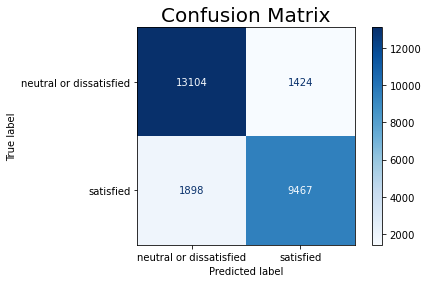

In [15]:
# plot for confusion matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
print("LogisticRegression")
plot_confusion_matrix(LR_pipe, X_test, y_test,cmap="Blues",values_format="d",display_labels=["neutral or dissatisfied", "satisfied"])
plt.title("Confusion Matrix", fontsize=20)
plt.grid(b=False)
plt.show()

<Figure size 432x432 with 0 Axes>

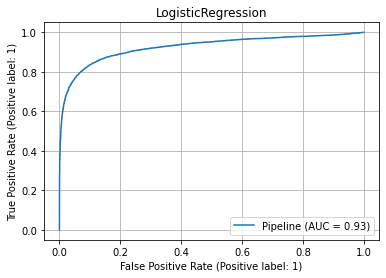

In [16]:
# plot receiver operating characteristic (ROC) curve 
# The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) 
# at various threshold settings. 

from sklearn import datasets, metrics, model_selection
from sklearn.metrics import plot_roc_curve


fig = plt.figure(figsize=(6, 6))

lr_roc = plot_roc_curve(LR_pipe, X_test, y_test)

plt.title('LogisticRegression')
plt.grid(True)
plt.legend()
plt.show()

# For-loop for three ML models 
LogisticRegression, RandomForestClassifier, decision_function_shape

In [17]:
# For-loop for running three models
for clf, label in zip([LR_pipe, RF_pipe, SVM_pipe], ['Log_Reg', 'Ran_For', 'SVM' ]):
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    print (label+" Model \n")
    print("Accuracy score: " + str(accuracy_score(y_test, predictions)))
    print("Confusion matrix: \n" + str(confusion_matrix(y_test, predictions)))
    print("Classification_reports: \n" + str(classification_report(y_test, predictions)) + "\n\n")

Log_Reg Model 

Accuracy score: 0.8717027768122658
Confusion matrix: 
[[13104  1424]
 [ 1898  9467]]
Classification_reports: 
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     14528
           1       0.87      0.83      0.85     11365

    accuracy                           0.87     25893
   macro avg       0.87      0.87      0.87     25893
weighted avg       0.87      0.87      0.87     25893



Ran_For Model 

Accuracy score: 0.9238790406673618
Confusion matrix: 
[[13558   970]
 [ 1001 10364]]
Classification_reports: 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     14528
           1       0.91      0.91      0.91     11365

    accuracy                           0.92     25893
   macro avg       0.92      0.92      0.92     25893
weighted avg       0.92      0.92      0.92     25893



SVM Model 

Accuracy score: 0.954118873826903
Confusion matrix: 
[[14065   463]
 [  725 10

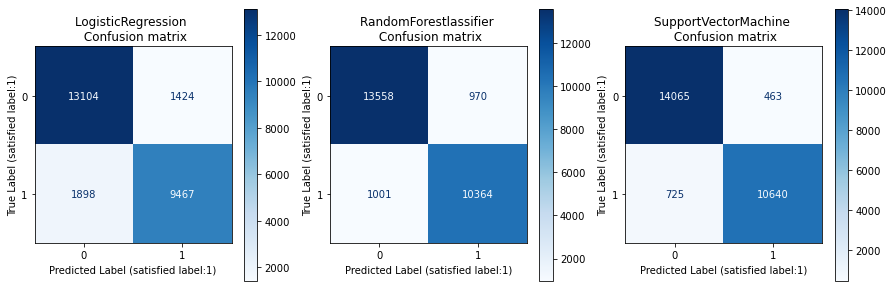

In [18]:
# plot confusion matrix
from sklearn.metrics import plot_confusion_matrix

fig, [ax_lrcm, ax_rfcm, ax_svmcm] = plt.subplots(1, 3, figsize=(15, 5))
plot_confusion_matrix(LR_pipe, X_test, y_test,cmap="Blues",values_format="d", ax=ax_lrcm)
plot_confusion_matrix(RF_pipe, X_test, y_test,cmap="Blues",values_format="d", ax=ax_rfcm)
plot_confusion_matrix(SVM_pipe, X_test, y_test,cmap="Blues",values_format="d", ax=ax_svmcm)

ax_lrcm.set_title('LogisticRegression \n Confusion matrix')
ax_rfcm.set_title('RandomForestlassifier \n Confusion matrix')
ax_svmcm.set_title('SupportVectorMachine \n Confusion matrix')

ax_lrcm.set_xlabel("Predicted Label (satisfied label:1)")
ax_lrcm.set_ylabel("True Label (satisfied label:1)")
ax_rfcm.set_xlabel("Predicted Label (satisfied label:1)")
ax_rfcm.set_ylabel("True Label (satisfied label:1)")
ax_svmcm.set_xlabel("Predicted Label (satisfied label:1)")
ax_svmcm.set_ylabel("True Label (satisfied label:1)")
plt.show()

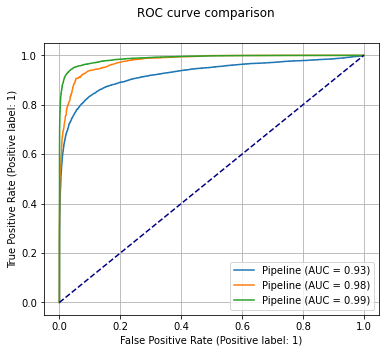

In [19]:
# ROC curves
LR_roc = plot_roc_curve(LR_pipe, X_test, y_test)
RF_roc =plot_roc_curve(RF_pipe, X_test, y_test, ax=LR_roc.ax_)
SVM_roc = plot_roc_curve(SVM_pipe, X_test, y_test, ax=LR_roc.ax_)
SVM_roc.figure_.suptitle("ROC curve comparison")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.gcf().set_size_inches(6, 5)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Feature Correlation

In [20]:
# Create dataframes
df2 = new_train
#Transpose and obtain descriptive statistics of dataset
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,103594.0,39.380466,15.113125,7.0,27.0,40.0,51.0,85.0
Flight Distance,103594.0,1189.325202,997.297235,31.0,414.0,842.0,1743.0,4983.0
Inflight wifi,103594.0,2.729753,1.327866,0.0,2.0,3.0,4.0,5.0
Departure/Arrival_time_convenient,103594.0,3.060081,1.525233,0.0,2.0,3.0,4.0,5.0
Ease_of_Online booking,103594.0,2.756984,1.398934,0.0,2.0,3.0,4.0,5.0
Gate_location,103594.0,2.977026,1.277723,0.0,2.0,3.0,4.0,5.0
Food_and_drink,103594.0,3.202126,1.329401,0.0,2.0,3.0,4.0,5.0
Online boarding,103594.0,3.250497,1.349433,0.0,2.0,3.0,4.0,5.0
Seat comfort,103594.0,3.439765,1.318896,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,103594.0,3.358341,1.333030,0.0,2.0,4.0,4.0,5.0


In [21]:
df2.columns

Index(['Gender', 'Customer', 'Age', 'Type_of_Travel', 'Class',
       'Flight Distance', 'Inflight wifi', 'Departure/Arrival_time_convenient',
       'Ease_of_Online booking', 'Gate_location', 'Food_and_drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [22]:
#Create a function to convert class from categorical variable to numerical
def clas(string):
    if string == 'Business': return 2
    elif string =='Eco Plus': return 1
    else: return 0

df2['Class'] =df2['Class'].apply(clas)

In [23]:
#Create a function to convert type_of_travel from categorical variable to numerical
def tot(string):
    if string == 'Business travel': return 1
    else: return 0

df2['Type_of_Travel'] =df2['Type_of_Travel'].apply(tot)

In [24]:
# label encoder's fit_transform() method is used to first train the label encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['Gender'] = le.fit_transform(df2['Gender'])
df2['Customer'] = le.fit_transform(df2['Customer'])
df2['satisfaction'] = le.fit_transform(df2[ 'satisfaction'])
df2.head(10)

,Gender,Customer,Age,Type_of_Travel,Class,Flight Distance,Inflight wifi,Departure/Arrival_time_convenient,Ease_of_Online booking,Gate_location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,1,0,60.0,1,2,912.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,3.0,2.0,2.0,39.0,23.0,0
1,1,1,38.0,1,2,208.0,3.0,3.0,3.0,4.0,...,5.0,4.0,5.0,4.0,4.0,4.0,5.0,0.0,0.0,0
2,1,0,31.0,1,2,3147.0,1.0,1.0,1.0,1.0,...,5.0,4.0,3.0,5.0,5.0,5.0,5.0,2.0,0.0,1
3,1,0,53.0,1,2,2327.0,3.0,2.0,2.0,2.0,...,3.0,5.0,3.0,4.0,3.0,1.0,3.0,186.0,182.0,0
4,1,0,30.0,0,0,650.0,3.0,4.0,3.0,4.0,...,3.0,2.0,2.0,4.0,3.0,4.0,3.0,0.0,0.0,0
5,0,0,57.0,1,2,3621.0,5.0,5.0,5.0,5.0,...,4.0,4.0,5.0,4.0,4.0,4.0,3.0,0.0,0.0,1
6,1,1,30.0,1,0,853.0,2.0,2.0,2.0,3.0,...,4.0,1.0,1.0,3.0,3.0,4.0,4.0,0.0,0.0,0
7,1,1,22.0,1,0,235.0,3.0,0.0,3.0,3.0,...,2.0,4.0,3.0,4.0,4.0,4.0,2.0,22.0,105.0,0
8,0,0,37.0,1,2,3977.0,2.0,2.0,2.0,2.0,...,4.0,4.0,4.0,4.0,4.0,4.0,3.0,0.0,0.0,1
9,0,1,23.0,1,0,1131.0,2.0,2.0,2.0,4.0,...,2.0,2.0,2.0,3.0,3.0,4.0,2.0,0.0,0.0,0


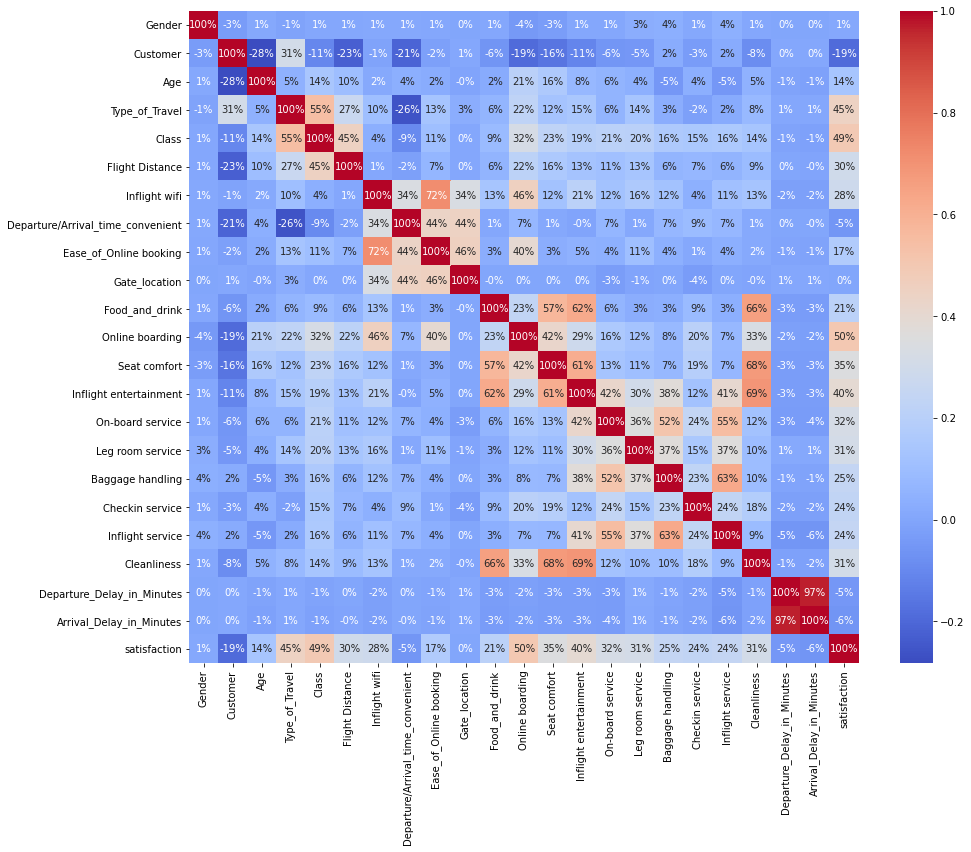

In [25]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
# A glance at the correlations
ax = plt.figure(figsize=(15,12))
sns.heatmap(df2.corr(),annot=True,cmap="coolwarm",fmt='.0%')
plt.show()

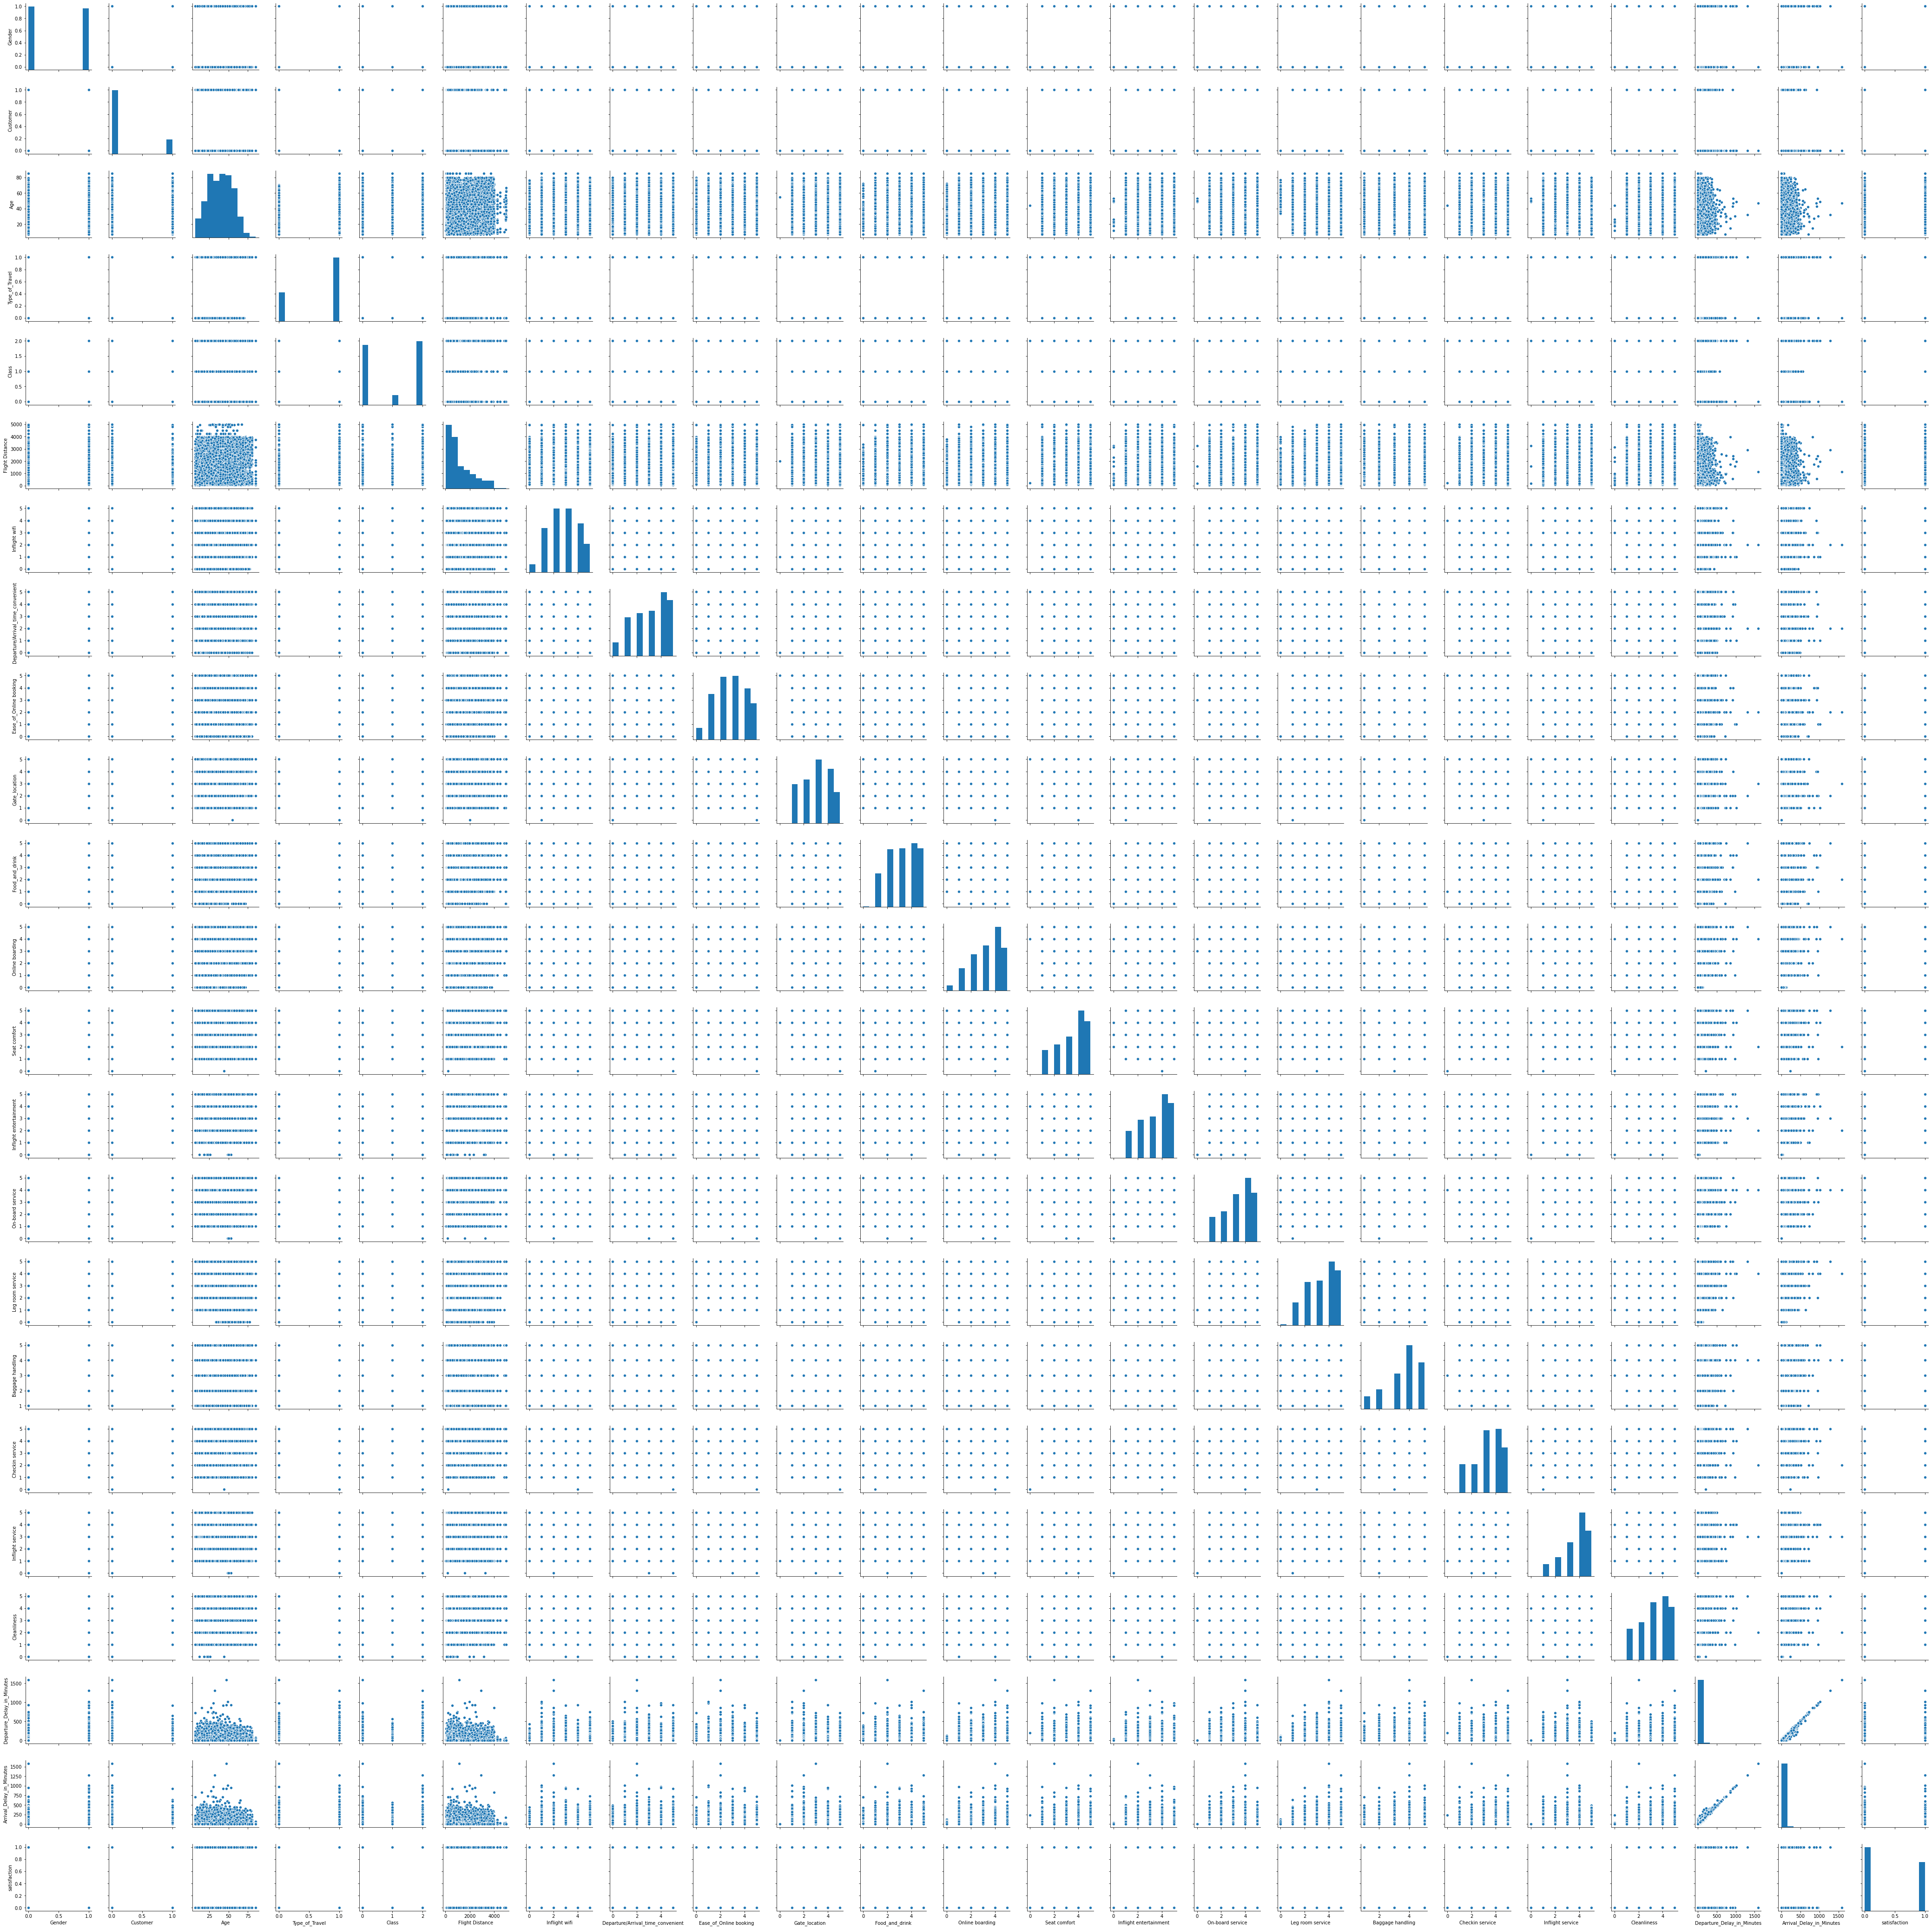

In [26]:
sns.pairplot(df2)

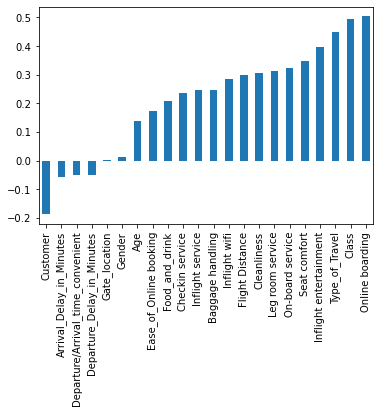

In [27]:
#Rank features from highest to lowest correlation with outcome variable of satisfactioN
df2.corr()['satisfaction'].sort_values().drop('satisfaction').plot(kind='bar')

In [28]:
df2.corr()['satisfaction'].sort_values().drop('satisfaction')

Customer                            -0.187558
Arrival_Delay_in_Minutes            -0.057582
Departure/Arrival_time_convenient   -0.051718
Departure_Delay_in_Minutes          -0.050515
Gate_location                        0.000449
Gender                               0.012356
Age                                  0.137040
Ease_of_Online booking               0.171507
Food_and_drink                       0.209659
Checkin service                      0.235914
Inflight service                     0.244852
Baggage handling                     0.247819
Inflight wifi                        0.284163
Flight Distance                      0.298915
Cleanliness                          0.305050
Leg room service                     0.313182
On-board service                     0.322450
Seat comfort                         0.349112
Inflight entertainment               0.398203
Type_of_Travel                       0.448995
Class                                0.494545
Online boarding                   

## Preprocessing with top 10 features on Satisfaction

In [29]:
numeric_features = ['Online boarding', 'Inflight entertainment','Seat comfort','On-board service','Leg room service',
                    'Cleanliness', 'Flight Distance','Inflight wifi']

categorical_features = ['Class', 'Type_of_Travel', ]

In [30]:
# we can use the sklearn.compose, make_column_selector, but it gives an error when using with sqlalchemy
# Numeric transforamation by SimpleImputer and StandardScaler
numeric_transformer = Pipeline(steps=[ 
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Categorical transformation by OneHotEncoder
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Setup the columntransformer using two numeric and categorical transformers
processor = ColumnTransformer(transformers=[
        ('numerical', numeric_transformer, numeric_features),
        ('catategorical', categorical_transformer, categorical_features)])

LR_pipe = make_pipeline(processor, LogisticRegression(solver='lbfgs', random_state=1))
RF_pipe = make_pipeline(processor, RandomForestClassifier(max_depth=5, n_estimators=20, max_features=10))                  
SVM_pipe = make_pipeline(processor, svm.SVC(decision_function_shape='ovr', C=1))

In [31]:
# For-loop for running three models
for clf, label in zip([LR_pipe, RF_pipe, SVM_pipe], ['Log_Reg', 'Ran_For', 'SVM' ]):
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    print (label+" Model \n")
    print("Accuracy score: " + str(accuracy_score(y_test, predictions)))
    print("Confusion matrix: \n" + str(confusion_matrix(y_test, predictions)))
    print("Classification_reports: \n" + str(classification_report(y_test, predictions)) + "\n\n")

Log_Reg Model 

Accuracy score: 0.8512339242266249
Confusion matrix: 
[[12762  1766]
 [ 2086  9279]]
Classification_reports: 
              precision    recall  f1-score   support

           0       0.86      0.88      0.87     14528
           1       0.84      0.82      0.83     11365

    accuracy                           0.85     25893
   macro avg       0.85      0.85      0.85     25893
weighted avg       0.85      0.85      0.85     25893



Ran_For Model 

Accuracy score: 0.919862511103387
Confusion matrix: 
[[13436  1092]
 [  983 10382]]
Classification_reports: 
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     14528
           1       0.90      0.91      0.91     11365

    accuracy                           0.92     25893
   macro avg       0.92      0.92      0.92     25893
weighted avg       0.92      0.92      0.92     25893



SVM Model 

Accuracy score: 0.9360444907890163
Confusion matrix: 
[[13747   781]
 [  875 10

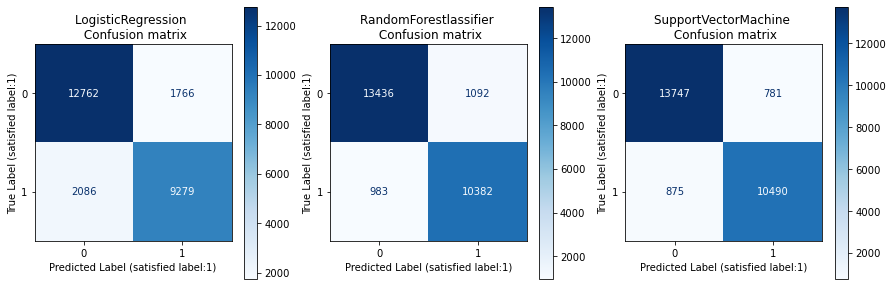

In [32]:
# plot confusion matrix
from sklearn.metrics import plot_confusion_matrix

fig, [ax_lrcm, ax_rfcm, ax_svmcm] = plt.subplots(1, 3, figsize=(15, 5))
plot_confusion_matrix(LR_pipe, X_test, y_test,cmap="Blues",values_format="d", ax=ax_lrcm)
plot_confusion_matrix(RF_pipe, X_test, y_test,cmap="Blues",values_format="d", ax=ax_rfcm)
plot_confusion_matrix(SVM_pipe, X_test, y_test,cmap="Blues",values_format="d", ax=ax_svmcm)

ax_lrcm.set_title('LogisticRegression \n Confusion matrix')
ax_rfcm.set_title('RandomForestlassifier \n Confusion matrix')
ax_svmcm.set_title('SupportVectorMachine \n Confusion matrix')

ax_lrcm.set_xlabel("Predicted Label (satisfied label:1)")
ax_lrcm.set_ylabel("True Label (satisfied label:1)")
ax_rfcm.set_xlabel("Predicted Label (satisfied label:1)")
ax_rfcm.set_ylabel("True Label (satisfied label:1)")
ax_svmcm.set_xlabel("Predicted Label (satisfied label:1)")
ax_svmcm.set_ylabel("True Label (satisfied label:1)")
plt.show()

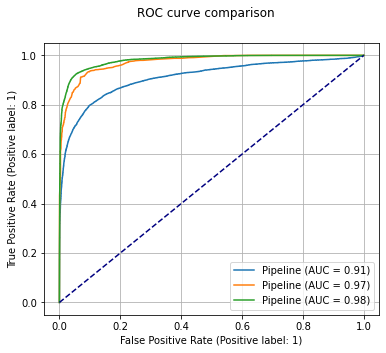

In [33]:
# ROC curves
LR_roc = plot_roc_curve(LR_pipe, X_test, y_test)
RF_roc =plot_roc_curve(RF_pipe, X_test, y_test, ax=LR_roc.ax_)
SVM_roc = plot_roc_curve(SVM_pipe, X_test, y_test, ax=LR_roc.ax_)
SVM_roc.figure_.suptitle("ROC curve comparison")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.gcf().set_size_inches(6, 5)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()